In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns



In [31]:
dfHotels = pd.read_csv('./Dataset/hotels.csv')
dfHotels.head()

,hotel_id,hotel_name,city,country,star_rating,lat,lon,cleanliness_base,comfort_base,facilities_base,location_base,staff_base,value_for_money_base
0,1,The Azure Tower,New York,United States,5,40.7580,-73.9855,9.1,8.8,8.9,9.5,8.6,8.0
1,2,The Royal Compass,London,United Kingdom,5,51.5072,-0.1276,9.0,9.2,8.8,9.4,9.0,7.9
2,3,L'Étoile Palace,Paris,France,5,48.8566,2.3522,8.8,9.4,8.7,9.6,9.3,8.1
3,4,Kyo-to Grand,Tokyo,Japan,5,35.6895,139.6917,9.6,9.0,9.3,8.5,9.5,8.2
4,5,The Golden Oasis,Dubai,United Arab Emirates,5,25.2769,55.2962,9.3,9.5,9.6,8.9,9.4,8.5


In [4]:
dfHotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   hotel_id              25 non-null     int64  
 1   hotel_name            25 non-null     object 
 2   city                  25 non-null     object 
 3   country               25 non-null     object 
 4   star_rating           25 non-null     int64  
 5   lat                   25 non-null     float64
 6   lon                   25 non-null     float64
 7   cleanliness_base      25 non-null     float64
 8   comfort_base          25 non-null     float64
 9   facilities_base       25 non-null     float64
 10  location_base         25 non-null     float64
 11  staff_base            25 non-null     float64
 12  value_for_money_base  25 non-null     float64
dtypes: float64(8), int64(2), object(3)
memory usage: 2.7+ KB


In [32]:
dfReviews = pd.read_csv('./Dataset/reviews.csv')
dfReviews.head()


,review_id,user_id,hotel_id,review_date,score_overall,score_cleanliness,score_comfort,score_facilities,score_location,score_staff,score_value_for_money,review_text
0,1,1600,1,2022-10-07,8.7,8.6,8.7,8.5,9.0,8.8,8.7,Practice reduce young our because machine. Rec...
1,2,432,4,2020-03-24,9.1,10.0,9.1,9.0,8.6,9.4,8.6,Test cover traditional black. Process tell Mr ...
2,3,186,18,2023-12-18,8.8,9.7,8.8,8.3,8.7,8.1,8.6,Friend million student social study yeah. Grow...
3,4,1403,19,2022-06-22,8.9,9.0,8.8,8.5,9.6,9.1,8.3,Huge girl already remain truth behind card. Ap...
4,5,1723,17,2022-07-02,9.1,8.9,9.5,9.3,8.3,9.4,8.9,Cover feeling call community serve television ...


In [6]:
dfReviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   review_id              50000 non-null  int64  
 1   user_id                50000 non-null  int64  
 2   hotel_id               50000 non-null  int64  
 3   review_date            50000 non-null  object 
 4   score_overall          50000 non-null  float64
 5   score_cleanliness      50000 non-null  float64
 6   score_comfort          50000 non-null  float64
 7   score_facilities       50000 non-null  float64
 8   score_location         50000 non-null  float64
 9   score_staff            50000 non-null  float64
 10  score_value_for_money  50000 non-null  float64
 11  review_text            50000 non-null  object 
dtypes: float64(7), int64(3), object(2)
memory usage: 4.6+ MB


In [33]:
dfUsers = pd.read_csv('./Dataset/users.csv')
dfUsers.head()


,user_id,user_gender,country,age_group,traveller_type,join_date
0,1,Female,United Kingdom,35-44,Solo,2024-09-29
1,2,Male,United Kingdom,25-34,Solo,2023-11-29
2,3,Female,Mexico,25-34,Family,2022-04-03
3,4,Male,India,35-44,Family,2023-12-02
4,5,Other,Japan,25-34,Solo,2021-12-18


In [8]:
dfUsers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   user_id         2000 non-null   int64 
 1   user_gender     2000 non-null   object
 2   country         2000 non-null   object
 3   age_group       2000 non-null   object
 4   traveller_type  2000 non-null   object
 5   join_date       2000 non-null   object
dtypes: int64(1), object(5)
memory usage: 93.9+ KB


In [9]:
dfUsers['age_group'].value_counts()

age_group
25-34    653
35-44    611
45-54    317
18-24    218
55+      201
Name: count, dtype: int64

In [13]:
dfUsers['user_gender'].value_counts()

user_gender
Male      942
Female    864
Other     194
Name: count, dtype: int64

In [14]:
dfUsers['traveller_type'].value_counts()

traveller_type
Couple      694
Family      478
Solo        420
Business    408
Name: count, dtype: int64

In [34]:
dfUsers = pd.get_dummies(dfUsers, columns=['user_gender'], drop_first=False)
dfUsers = dfUsers.drop(columns=['user_gender_Other'])

In [22]:
dfUsers.head()

,user_id,country,age_group,join_date,user_gender_Female,user_gender_Male,traveller_type_Couple,traveller_type_Family,traveller_type_Solo
0,1,United Kingdom,35-44,2024-09-29,True,False,False,False,True
1,2,United Kingdom,25-34,2023-11-29,False,True,False,False,True
2,3,Mexico,25-34,2022-04-03,True,False,False,True,False
3,4,India,35-44,2023-12-02,False,True,False,True,False
4,5,Japan,25-34,2021-12-18,False,False,False,False,True


In [23]:
dfHotels['country'].value_counts()

country
United States           1
United Kingdom          1
France                  1
Japan                   1
United Arab Emirates    1
Singapore               1
Australia               1
Brazil                  1
Germany                 1
Canada                  1
China                   1
Mexico                  1
India                   1
Italy                   1
South Africa            1
South Korea             1
Russia                  1
Egypt                   1
Spain                   1
Thailand                1
Turkey                  1
Netherlands             1
Argentina               1
Nigeria                 1
New Zealand             1
Name: count, dtype: int64

In [36]:
country_group = {
    # North America
    'United States': 'North_America',
    'Canada': 'North_America',

    # Western Europe
    'Germany': 'Western_Europe',
    'France': 'Western_Europe',
    'United Kingdom': 'Western_Europe',
    'Netherlands': 'Western_Europe',
    'Spain': 'Western_Europe',
    'Italy': 'Western_Europe',

    # Eastern Europe
    'Russia': 'Eastern_Europe',

    # East Asia
    'China': 'East_Asia',
    'Japan': 'East_Asia',
    'South Korea': 'East_Asia',

    # Southeast Asia
    'Thailand': 'Southeast_Asia',
    'Singapore': 'Southeast_Asia',

    # Middle East
    'United Arab Emirates': 'Middle_East',
    'Turkey': 'Middle_East',

    # Africa
    'Egypt': 'Africa',
    'Nigeria': 'Africa',
    'South Africa': 'Africa',

    # Oceania
    'Australia': 'Oceania',
    'New Zealand': 'Oceania',

    # South America
    'Brazil': 'South_America',
    'Argentina': 'South_America',

    # South Asia
    'India': 'South_Asia',

    # North America (Mexico)
    'Mexico': 'North_America_Mexico'
}


# Create the new column
dfHotels['country_group'] = dfHotels['country'].map(country_group)

In [37]:
dfHotels.head()

,hotel_id,hotel_name,city,country,star_rating,lat,lon,cleanliness_base,comfort_base,facilities_base,location_base,staff_base,value_for_money_base,country_group
0,1,The Azure Tower,New York,United States,5,40.7580,-73.9855,9.1,8.8,8.9,9.5,8.6,8.0,North_America
1,2,The Royal Compass,London,United Kingdom,5,51.5072,-0.1276,9.0,9.2,8.8,9.4,9.0,7.9,Western_Europe
2,3,L'Étoile Palace,Paris,France,5,48.8566,2.3522,8.8,9.4,8.7,9.6,9.3,8.1,Western_Europe
3,4,Kyo-to Grand,Tokyo,Japan,5,35.6895,139.6917,9.6,9.0,9.3,8.5,9.5,8.2,East_Asia
4,5,The Golden Oasis,Dubai,United Arab Emirates,5,25.2769,55.2962,9.3,9.5,9.6,8.9,9.4,8.5,Middle_East


In [38]:
df = dfReviews.merge(dfUsers, on='user_id', how='left')
df = df.merge(dfHotels[['hotel_id', 'city']], on='hotel_id', how='left')

In [29]:
df.head()

,review_id,user_id,hotel_id,review_date,score_overall,score_cleanliness,score_comfort,score_facilities,score_location,score_staff,...,review_text,country,age_group,join_date,user_gender_Female,user_gender_Male,traveller_type_Couple,traveller_type_Family,traveller_type_Solo,city
0,1,1600,1,2022-10-07,8.7,8.6,8.7,8.5,9.0,8.8,...,Practice reduce young our because machine. Rec...,New Zealand,25-34,2021-03-21,True,False,False,False,True,New York
1,2,432,4,2020-03-24,9.1,10.0,9.1,9.0,8.6,9.4,...,Test cover traditional black. Process tell Mr ...,United Kingdom,35-44,2025-04-01,True,False,True,False,False,Tokyo
2,3,186,18,2023-12-18,8.8,9.7,8.8,8.3,8.7,8.1,...,Friend million student social study yeah. Grow...,Spain,55+,2021-10-28,True,False,True,False,False,Cairo
3,4,1403,19,2022-06-22,8.9,9.0,8.8,8.5,9.6,9.1,...,Huge girl already remain truth behind card. Ap...,United Kingdom,35-44,2023-10-10,True,False,False,False,False,Barcelona
4,5,1723,17,2022-07-02,9.1,8.9,9.5,9.3,8.3,9.4,...,Cover feeling call community serve television ...,Australia,45-54,2023-02-28,False,True,False,True,False,Moscow


In [39]:
df= df.drop(columns=['review_date' , 'score_cleanliness' ,'score_value_for_money', 'score_comfort' , 'score_facilities' , 'score_location' , 'score_staff' , 'review_text' , 'age_group' , 'join_date', 'user_gender_Female' , 'user_gender_Male'])

In [40]:
df.head()


,review_id,user_id,hotel_id,score_overall,country,traveller_type,city
0,1,1600,1,8.7,New Zealand,Solo,New York
1,2,432,4,9.1,United Kingdom,Couple,Tokyo
2,3,186,18,8.8,Spain,Couple,Cairo
3,4,1403,19,8.9,United Kingdom,Business,Barcelona
4,5,1723,17,9.1,Australia,Family,Moscow


In [41]:
df.tail(10)

,review_id,user_id,hotel_id,score_overall,country,traveller_type,city
49990,49991,13,19,9.0,Italy,Couple,Barcelona
49991,49992,927,24,8.7,Brazil,Solo,Lagos
49992,49993,1737,7,8.9,Japan,Family,Sydney
49993,49994,1427,12,8.7,Brazil,Family,Mexico City
49994,49995,327,16,9.2,United States,Family,Seoul
49995,49996,1786,24,8.4,Mexico,Business,Lagos
49996,49997,1739,8,8.8,New Zealand,Couple,Rio de Janeiro
49997,49998,1566,6,9.1,Russia,Couple,Singapore
49998,49999,10,21,9.0,United Kingdom,Solo,Istanbul
49999,50000,1626,19,9.2,Turkey,Family,Barcelona


In [42]:
avg_scores = df.groupby(['traveller_type', 'city'])['score_overall'].mean().reset_index()


In [43]:
best_cities = avg_scores.loc[avg_scores.groupby('traveller_type')['score_overall'].idxmax()]


C:\Users\abdul\AppData\Local\Temp\ipykernel_36104\2816700972.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=best_cities, x='traveller_type', y='score_overall', palette='coolwarm')


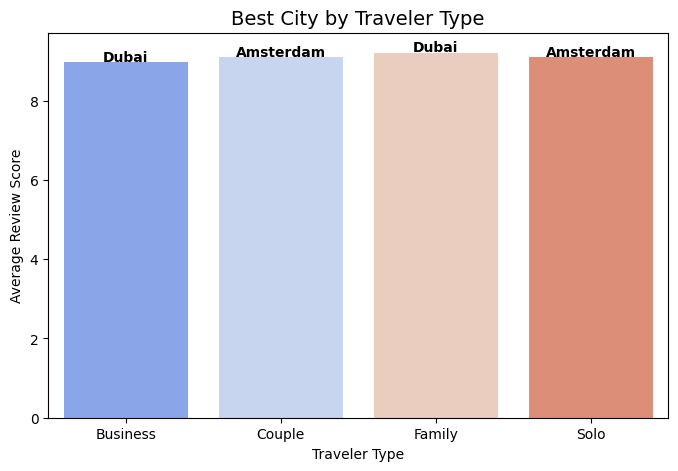

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(data=best_cities, x='traveller_type', y='score_overall', palette='coolwarm')

for i, (city, score) in enumerate(zip(best_cities['city'], best_cities['score_overall'])):
    plt.text(i, score + 0.02, city, ha='center', fontsize=10, fontweight='bold')

plt.title('Best City by Traveler Type', fontsize=14)
plt.xlabel('Traveler Type')
plt.ylabel('Average Review Score')
plt.ylim(0, best_cities['score_overall'].max() + 0.5)
plt.show()


In [49]:
for i, (trav_type, city, score) in enumerate(zip(best_cities['traveller_type'], 
                                                 best_cities['city'], 
                                                 best_cities['score_overall'])):
    print(f"{trav_type}: {city} — Average Score: {score:.2f}")

Business: Dubai — Average Score: 8.97
Couple: Amsterdam — Average Score: 9.10
Family: Dubai — Average Score: 9.21
Solo: Amsterdam — Average Score: 9.11
